In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 4
# d: VT

# Homework 4

**Enter your Name:**  Phillip McDonough

**Enter your PID:**  906263051

I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [2]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# %matplotlib inline
table = pd.read_csv('Counties2010.csv')
table.shape

(3146, 9)

**Problem 1. (20 points)** What does the data look like? Use pandas to create a scatterplot that maps PercentCollegeGrad to X, IncomePerCapita to Y, and Population to Size of the county dots. Be careful that your Size mapping does not cause some dots to disappear with size 0. Use transparency to reveal density (hint 'alpha' parameter).  Label the axes appropriately. Display the static plot big enough to see clearly. 

Return the Axes (or AxesSubplot) object in variable Answer1 (i.e., set Answer1 = table.plot.scatter(...)). 

*Think about: What interesting things do you notice in the plot?*

<AxesSubplot:xlabel='PercentCollegeGrad', ylabel='IncomePerCapita'>

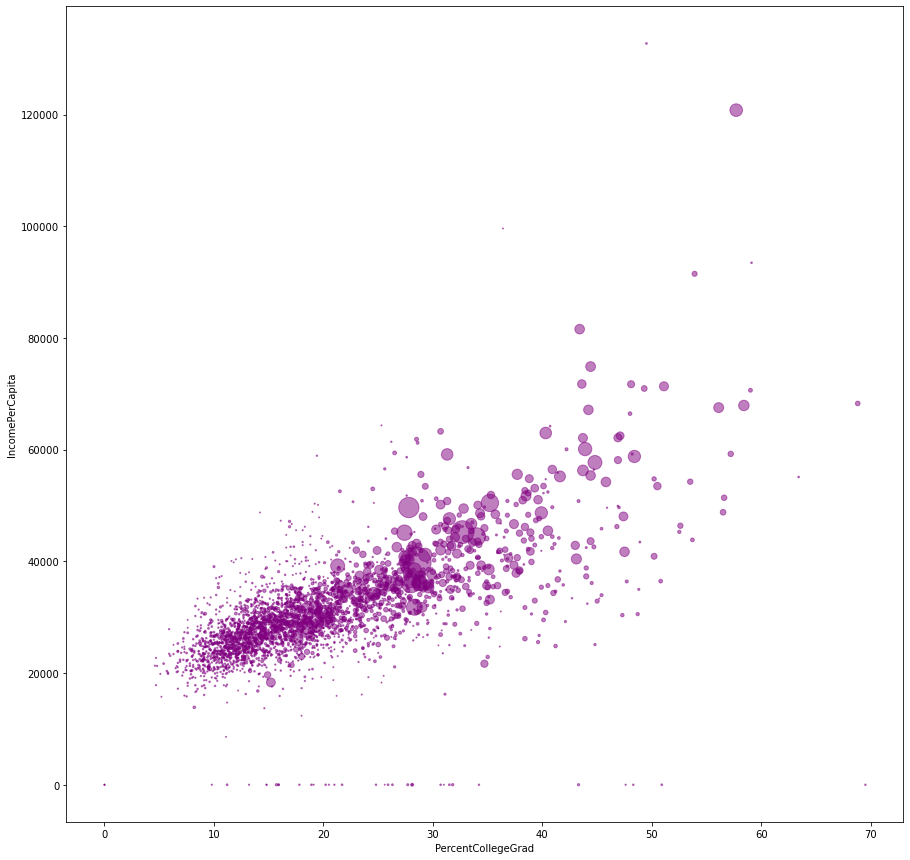

In [3]:
# Problem 1
# Insert your work here

Answer1 = table.plot.scatter(x="PercentCollegeGrad", y="IncomePerCapita", c="purple", 
                             s=table["Population"]/10000+1, figsize=(15,15), alpha=0.5, sharex=False)
Answer1

**Problem 2. (20 points)** How correlated are PercentCollegeGrad and IncomePerCapita?  First, filter out the broken counties that have 0 IncomePerCapita (**you should still use this filtered data for Problems 3-5**).  Then, compute the Pearson correlation coefficient r between PercentCollegeGrad and IncomePerCapita, which is defined as (you must use this definition; you must not use a library function for Pearson):
![formula](https://wikimedia.org/api/rest_v1/media/math/render/svg/bd1ccc2979b0fd1c1aec96e386f686ae874f9ec0)

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_sample
 
Hint: use Pandas column operations for this computation.
Return the result r as variable Answer2. 

In [4]:
# Problem 2
# Insert your work here

filtered_counties = table[table["IncomePerCapita"] != 0]

xs = (filtered_counties.PercentCollegeGrad - filtered_counties.PercentCollegeGrad.mean())
ys = (filtered_counties.IncomePerCapita - filtered_counties.IncomePerCapita.mean())

Answer2 = sum(xs*ys) / ( np.sqrt(sum(xs**2)) * np.sqrt(sum(ys**2)) )
Answer2

0.7146858984377265

**Problem 3. (20 points)** What are the linear regression parameters? Given the potential for correlation, fit a linear regression model to the filtered data (to predict IncomePerCapita based on PercentCollegeGrad) as follows: 

> IncomePerCapita = m * PercentCollegeGrad + b
    
Hint: use the numpy.polyfit() method with degree 1, 
https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html.
 
Return the result in variable Answer3 as a tuple of the form (m, b).

In [5]:
# Problem 3
# Insert your work here

params = np.polyfit(filtered_counties.PercentCollegeGrad, filtered_counties.IncomePerCapita, 1)
Answer3 = tuple(params)
Answer3

(688.3692972666519, 17539.487736399034)

**Problem 4. (20 points)** What is the regression error of each county?  Armed with the regression line from Problem 3, compute a new data column (called "Error") that represents an error measure for each county (in the filtered data). It should measure the distance of each county to the regression line, in the IncomePerCapita dimension. Positive error means the county's IncomePerCapita is greater than the line, negative means less than the line.

Return in variable Answer4 a DataFrame containing 3 columns (Name, State, Error) sorted by Error (from positive to negative).

*Think about: Can you think of potential reasons that these particular counties are extreme (in pos and neg direction)?*

In [6]:
# Problem 4
# Insert your work here

estimate_IPC = Answer3[0]*filtered_counties.PercentCollegeGrad + Answer3[1]

filtered_counties["Error"] = filtered_counties.IncomePerCapita - estimate_IPC

Answer4 = filtered_counties.loc[:, ["Name", "State", "Error"]].sort_values(by="Error", ascending=False)
Answer4

<ipython-input-6-97004f484f55>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_counties["Error"] = filtered_counties.IncomePerCapita - estimate_IPC


,Name,State,Error
3141,Teton,WY,81114.232049
2011,New York,NY,63531.603811
2673,Loving,TX,56996.869843
206,Marin,CA,36840.407141
293,Pitkin,CO,35242.886795
...,...,...,...
2801,Utah,UT,-19757.902352
2035,Tompkins,NY,-20512.072513
414,Clarke,GA,-21068.302784
681,Madison,ID,-22735.772881


**Problem 5. (20 points)** What does the regression and error look like, and where does Blacksburg fit in?  Use pandas to draw a scatterplot of the above results on the filtered data. The plot should map the same axes as in Problem 1, and map the absolute value of the Error measure to the color of the dots. Use an appropriate linear colormap (hint: not a rainbow scale!) No mapping for Size. Include a color legend.  The axes should be appropriately labeled.  

Add a line to the plot that represents the regression model result. (hint: plots can be overlaid using the ax parameter of the plot functions, or use Axes.add_line()).  Label 'Montgomery, VA' clearly in the plot with its name and an arrow pointing to its dot (hint: Axes.annotate()).

Return the Axes (or AxesSubplot) object as variable Answer5.

*Think about: How might you explain the position of Montgomery, VA? What additional data could be gathered to help you support your claim about Montgomery, VA?*
  

<AxesSubplot:xlabel='PercentCollegeGrad', ylabel='IncomePerCapita'>

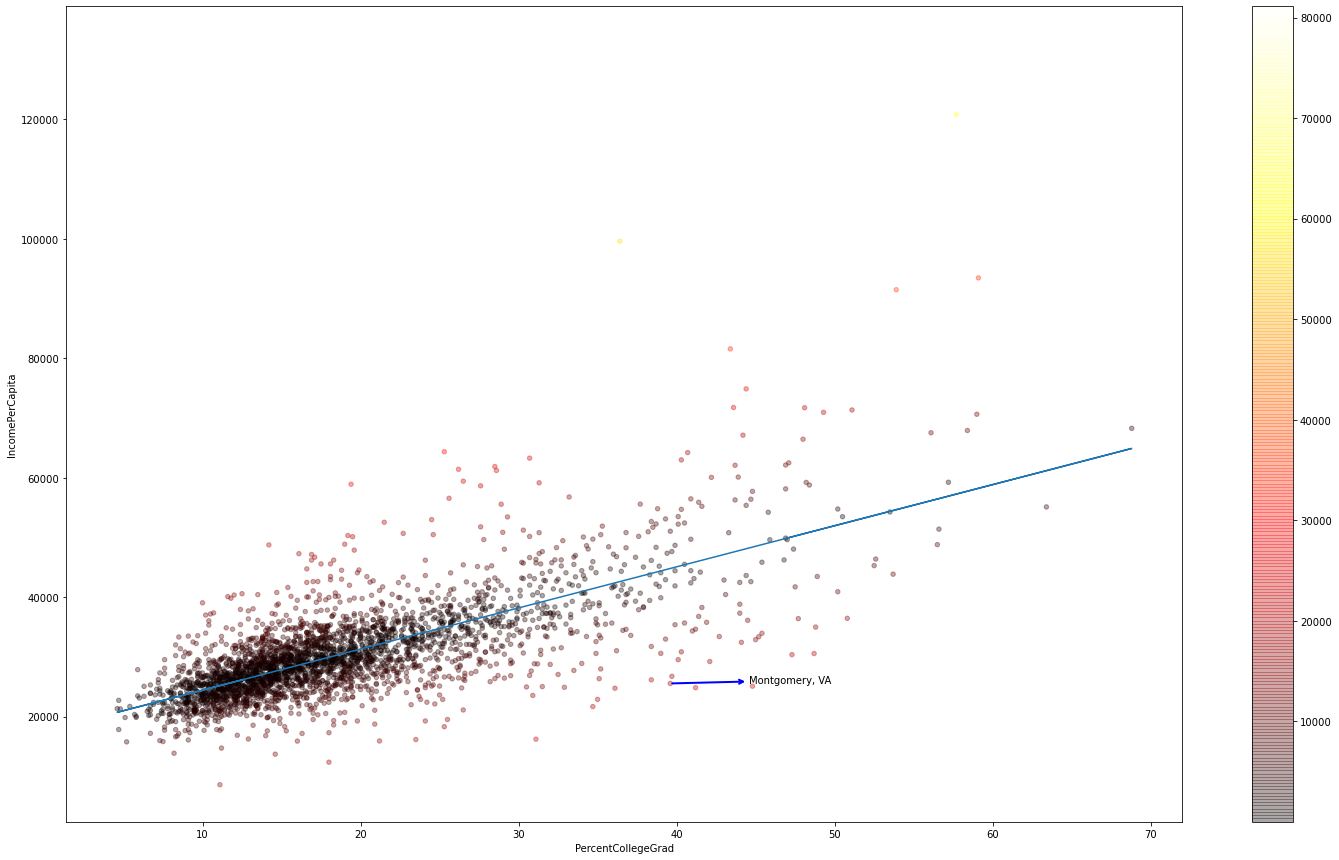

In [7]:
# Problem 5
# Insert your work here

Answer5 = filtered_counties.plot.scatter(x="PercentCollegeGrad", y="IncomePerCapita", 
                                         c=np.absolute(filtered_counties["Error"]), colormap=plt.cm.hot, 
                                         figsize=(25,15), alpha=0.35, sharex=False)

line = matplotlib.lines.Line2D(filtered_counties["PercentCollegeGrad"], estimate_IPC)
Answer5.add_line(line)

montgomery = filtered_counties.loc[(filtered_counties.Name == "Montgomery") & (filtered_counties.State == "VA")]
montgomery_points = ( montgomery.PercentCollegeGrad, montgomery.IncomePerCapita )

Answer5.annotate("Montgomery, VA", montgomery_points, xytext=(montgomery_points[0]+5,
                montgomery_points[1]-5) , arrowprops=dict(arrowstyle='<-', color='blue', linewidth=2))
Answer5

In [8]:
# scratch space

